# Visualisations of profiling data from the JUMP-Scope project

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import utilssphering
import numpy as np
import seaborn as sns

In [77]:
# Load data

df_replicating = pd.read_csv("checkpoints/moa-replicating-sphering.csv", converters={'Null_Replicating':utilssphering.safe_literal_eval, "Replicating":utilssphering.safe_literal_eval}, na_values=np.nan)
df_matching = pd.read_csv("checkpoints/moa-matching-sphering.csv", converters={'Null_Matching':utilssphering.safe_literal_eval, "Matching":utilssphering.safe_literal_eval})

In [78]:
df_replicating = df_replicating.rename(columns={"Value_95": "value_95_replicating"})
df_matching = df_matching.rename(columns={"Value_95": "value_95_matching"})
match_rep_df = df_replicating.merge(df_matching, how="inner")
# match_rep_df

In [6]:
# Vendor groupings with cell counts and percent_replicating

fov_df_replicating = pd.read_csv("checkpoints/fov-moa-replicating-sphering.csv")
fov_df_replicating

,Vendor,Batch,FoV_Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,...,Unnamed: 11,z_plane,BF_Zplanes,Anomaly,Replicating,Null_Replicating,Percent_Replicating,Value_95,sphering,Cell_Count
0,MolDev,Scope1_MolDev_10X,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,1,1,10,...,NaN,1,NaN,none,"[-0.0035480679468849917, -0.02713708204376649,...","[0.17027234950786785, 0.13900333845926563, -0....",16.666667,0.422942,False,511430.0
1,MolDev,Scope1_MolDev_10X,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,1,1,10,...,NaN,1,NaN,none,"[0.02610832466873135, 0.039859624120984205, 0....","[0.4762119559474569, 0.10500428034951437, 0.04...",23.333333,0.486495,False,617546.0
2,MolDev,Scope1_MolDev_10X_4siteZ,1siteSubSample_Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,1,1,10,...,NaN,1,NaN,none,"[-0.013443456762634672, -0.015926390000716273,...","[0.25752462811034627, 0.47213139105394264, 0.1...",20.000000,0.690499,False,608864.0
3,MolDev,Scope1_MolDev_20X_4site,1siteSubSample_Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,1,1,20,...,NaN,1,NaN,none,"[-0.06992517003129306, -0.05415402501605597, 0...","[0.7657344916664766, 0.14336897971716608, -0.0...",35.555556,0.307591,False,132155.0
4,MolDev,Scope1_MolDev_20X_9site,1siteSubSample_Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Confocal,9,1,1,20,...,NaN,1,NaN,none,"[0.09293820147883512, -0.027940625654125105, -...","[0.1621247129345303, -0.004260691744944573, 0....",25.555556,0.396294,False,137083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4,1,20,...,NaN,12,13,none,"[0.11787495125566441, 0.16802342032189477, 0.2...","[0.05965429039500269, 0.034506806955943006, 0....",41.111111,0.350589,False,544244.0
124,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch_12Z,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4,1,20,...,NaN,12,15,none,"[0.16959184770712224, 0.22233273446776852, 0.0...","[0.07904554316927097, 0.3074211982637538, 0.36...",48.888889,0.303630,False,543826.0
125,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4,1,20,...,NaN,12,15,none,"[0.38973771531652707, 0.01460006207482378, 0.1...","[0.36355671392208333, 0.12417270284300104, 0.0...",20.000000,0.620443,False,489099.0
126,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4,1,20,...,NaN,12,15,none,"[-0.04580911089947984, -0.041760079848138204, ...","[0.011714976389684677, 0.014188286525943564, -...",21.111111,0.677351,False,452567.0


In [64]:
def group_plot(df, x, y, group, fig=None, ax_=None):
    cmap = plt.cm.tab10
    colour_palette = list()
    for i in range(cmap.N):
        colour_palette.append(cmap(i))
    
    if fig is None and ax_ is None:
        fig, ax = plt.subplots(figsize=(7,7))
    else:
        ax = ax_
    for i, (group_label, group_df) in enumerate(df.groupby(group)):
        ax.scatter(
            group_df.loc[:, x], 
            group_df.loc[:, y], 
            color=colour_palette[i], 
            label=group_label
        )
    ax.set_title(group, size=15)
    ax.legend()
    ax.set_xscale("log")
    ax.set_xlabel(x, fontsize=15)
    ax.set_ylabel(y, fontsize=15)
    plt.tight_layout()
    fig.set_facecolor("white")
    plt.subplots_adjust( 
                    wspace=0.2,
                    hspace=0.2)


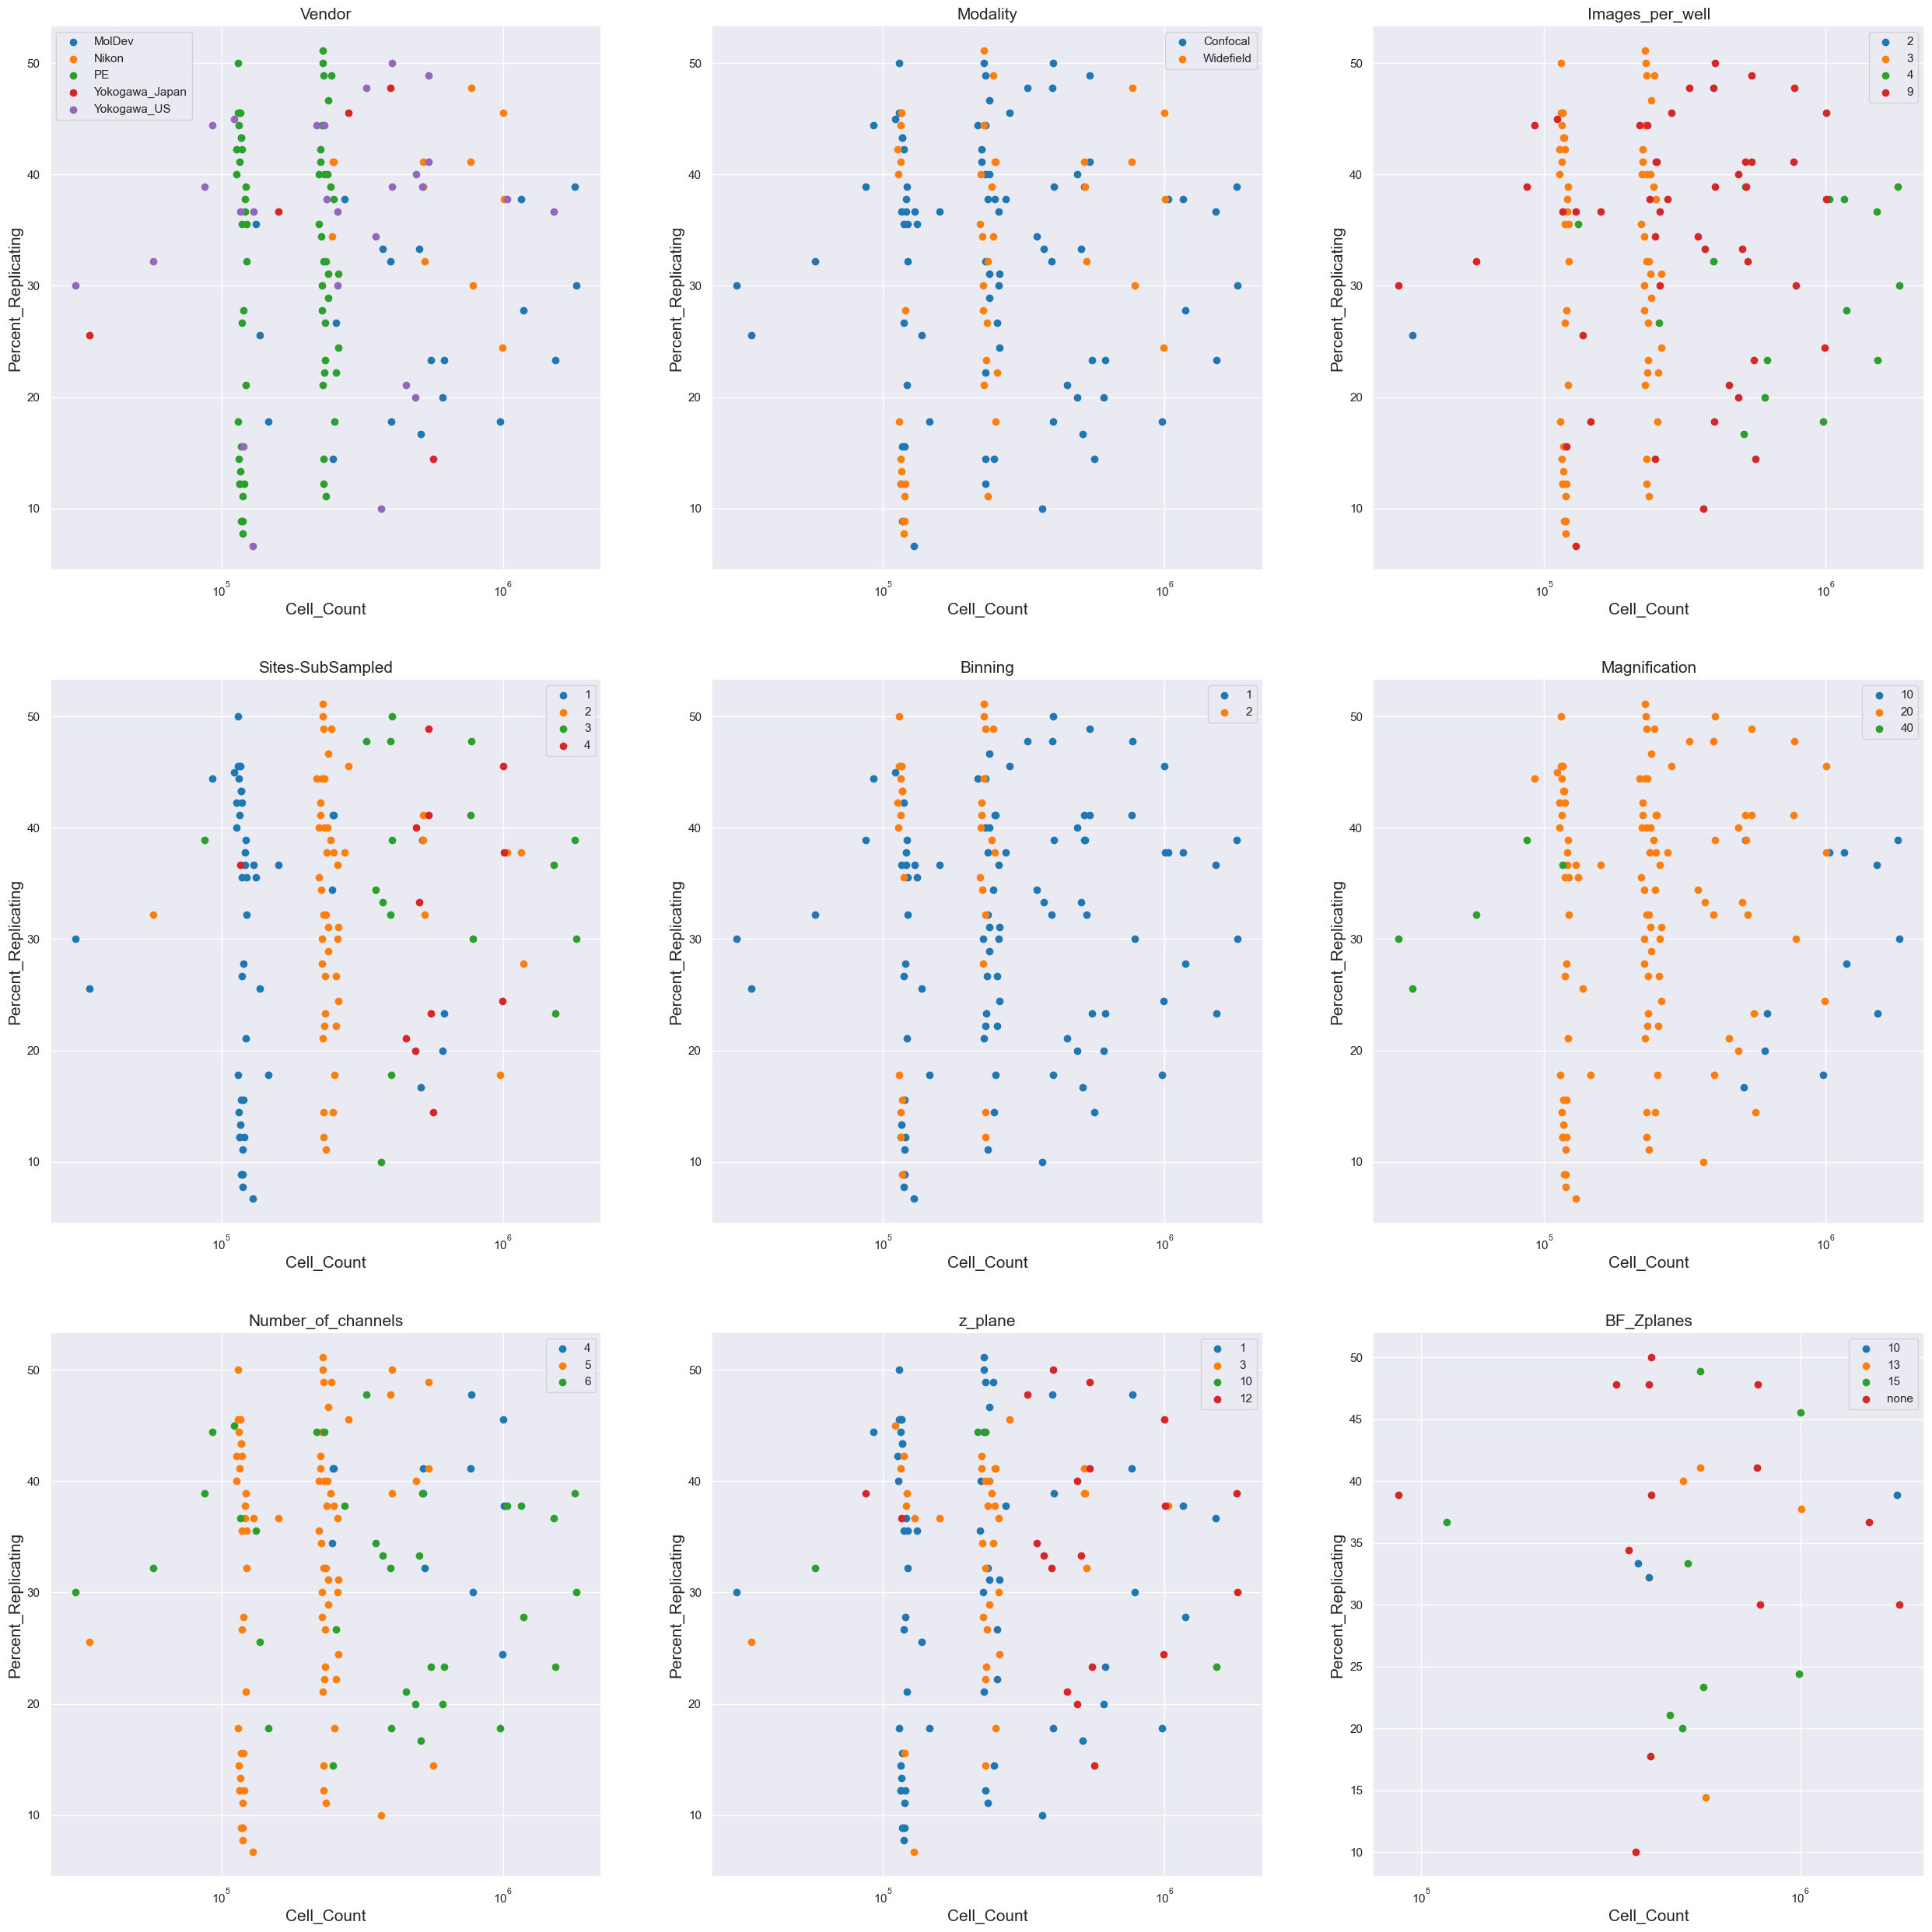

In [76]:
group_columns = ["Vendor", "Modality", "Images_per_well", "Sites-SubSampled", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes"]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(25,25))
for i, _ax in zip(group_columns, ax.flatten()):
    group_plot(fov_df_replicating, "Cell_Count", "Percent_Replicating", i, fig, _ax)
fig.savefig("figures/rep_vs_cell-count_siteSubSample_groupings.png")


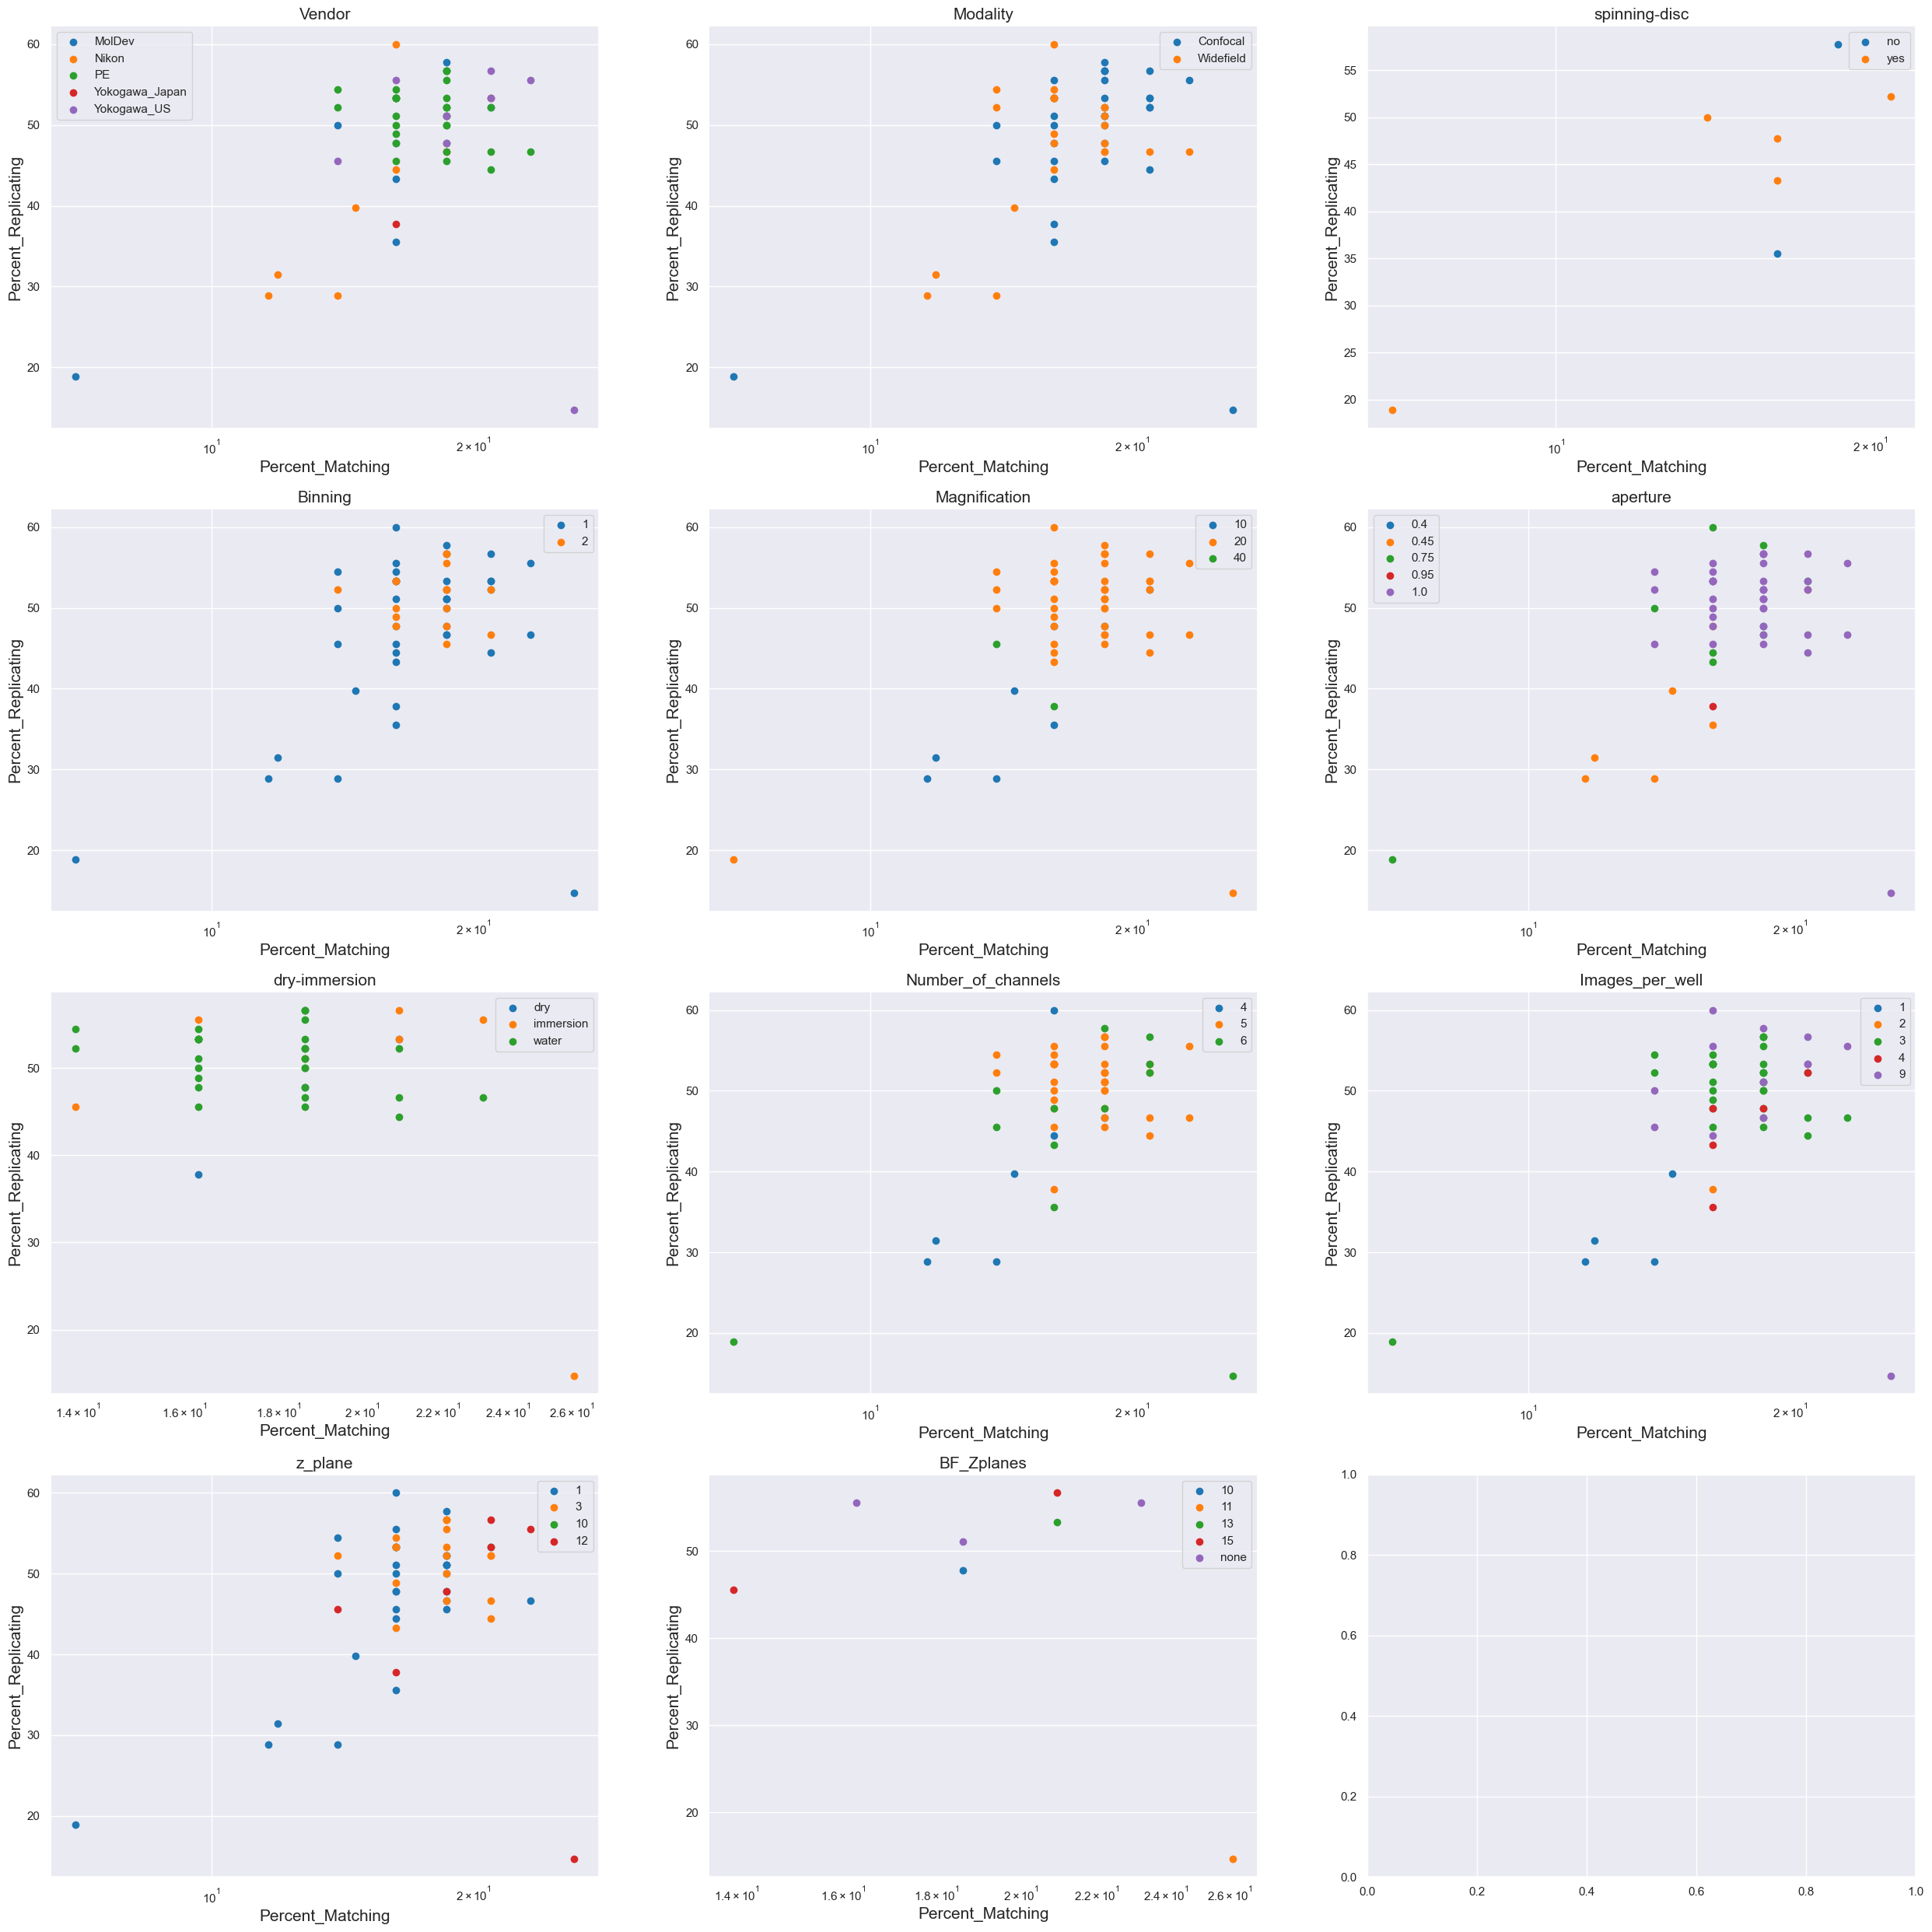

In [80]:
match_rep_df_sphere = match_rep_df.loc[match_rep_df["sphering"] == False].drop("sphering", axis=1)

group_columns = ["Vendor", "Modality", "spinning-disc", "Binning", 
                "Magnification", "aperture", "dry-immersion",
                "Number_of_channels", "Images_per_well",
                "z_plane", "BF_Zplanes"
                ]

fig, ax = plt.subplots(4,3, figsize=(25,25))
for i, _ax in zip(group_columns, ax.flatten()):
    group_plot(match_rep_df_sphere, "Percent_Matching", "Percent_Replicating", i, fig, _ax)
fig.savefig("figures/rep_vs_match_groupings.png")


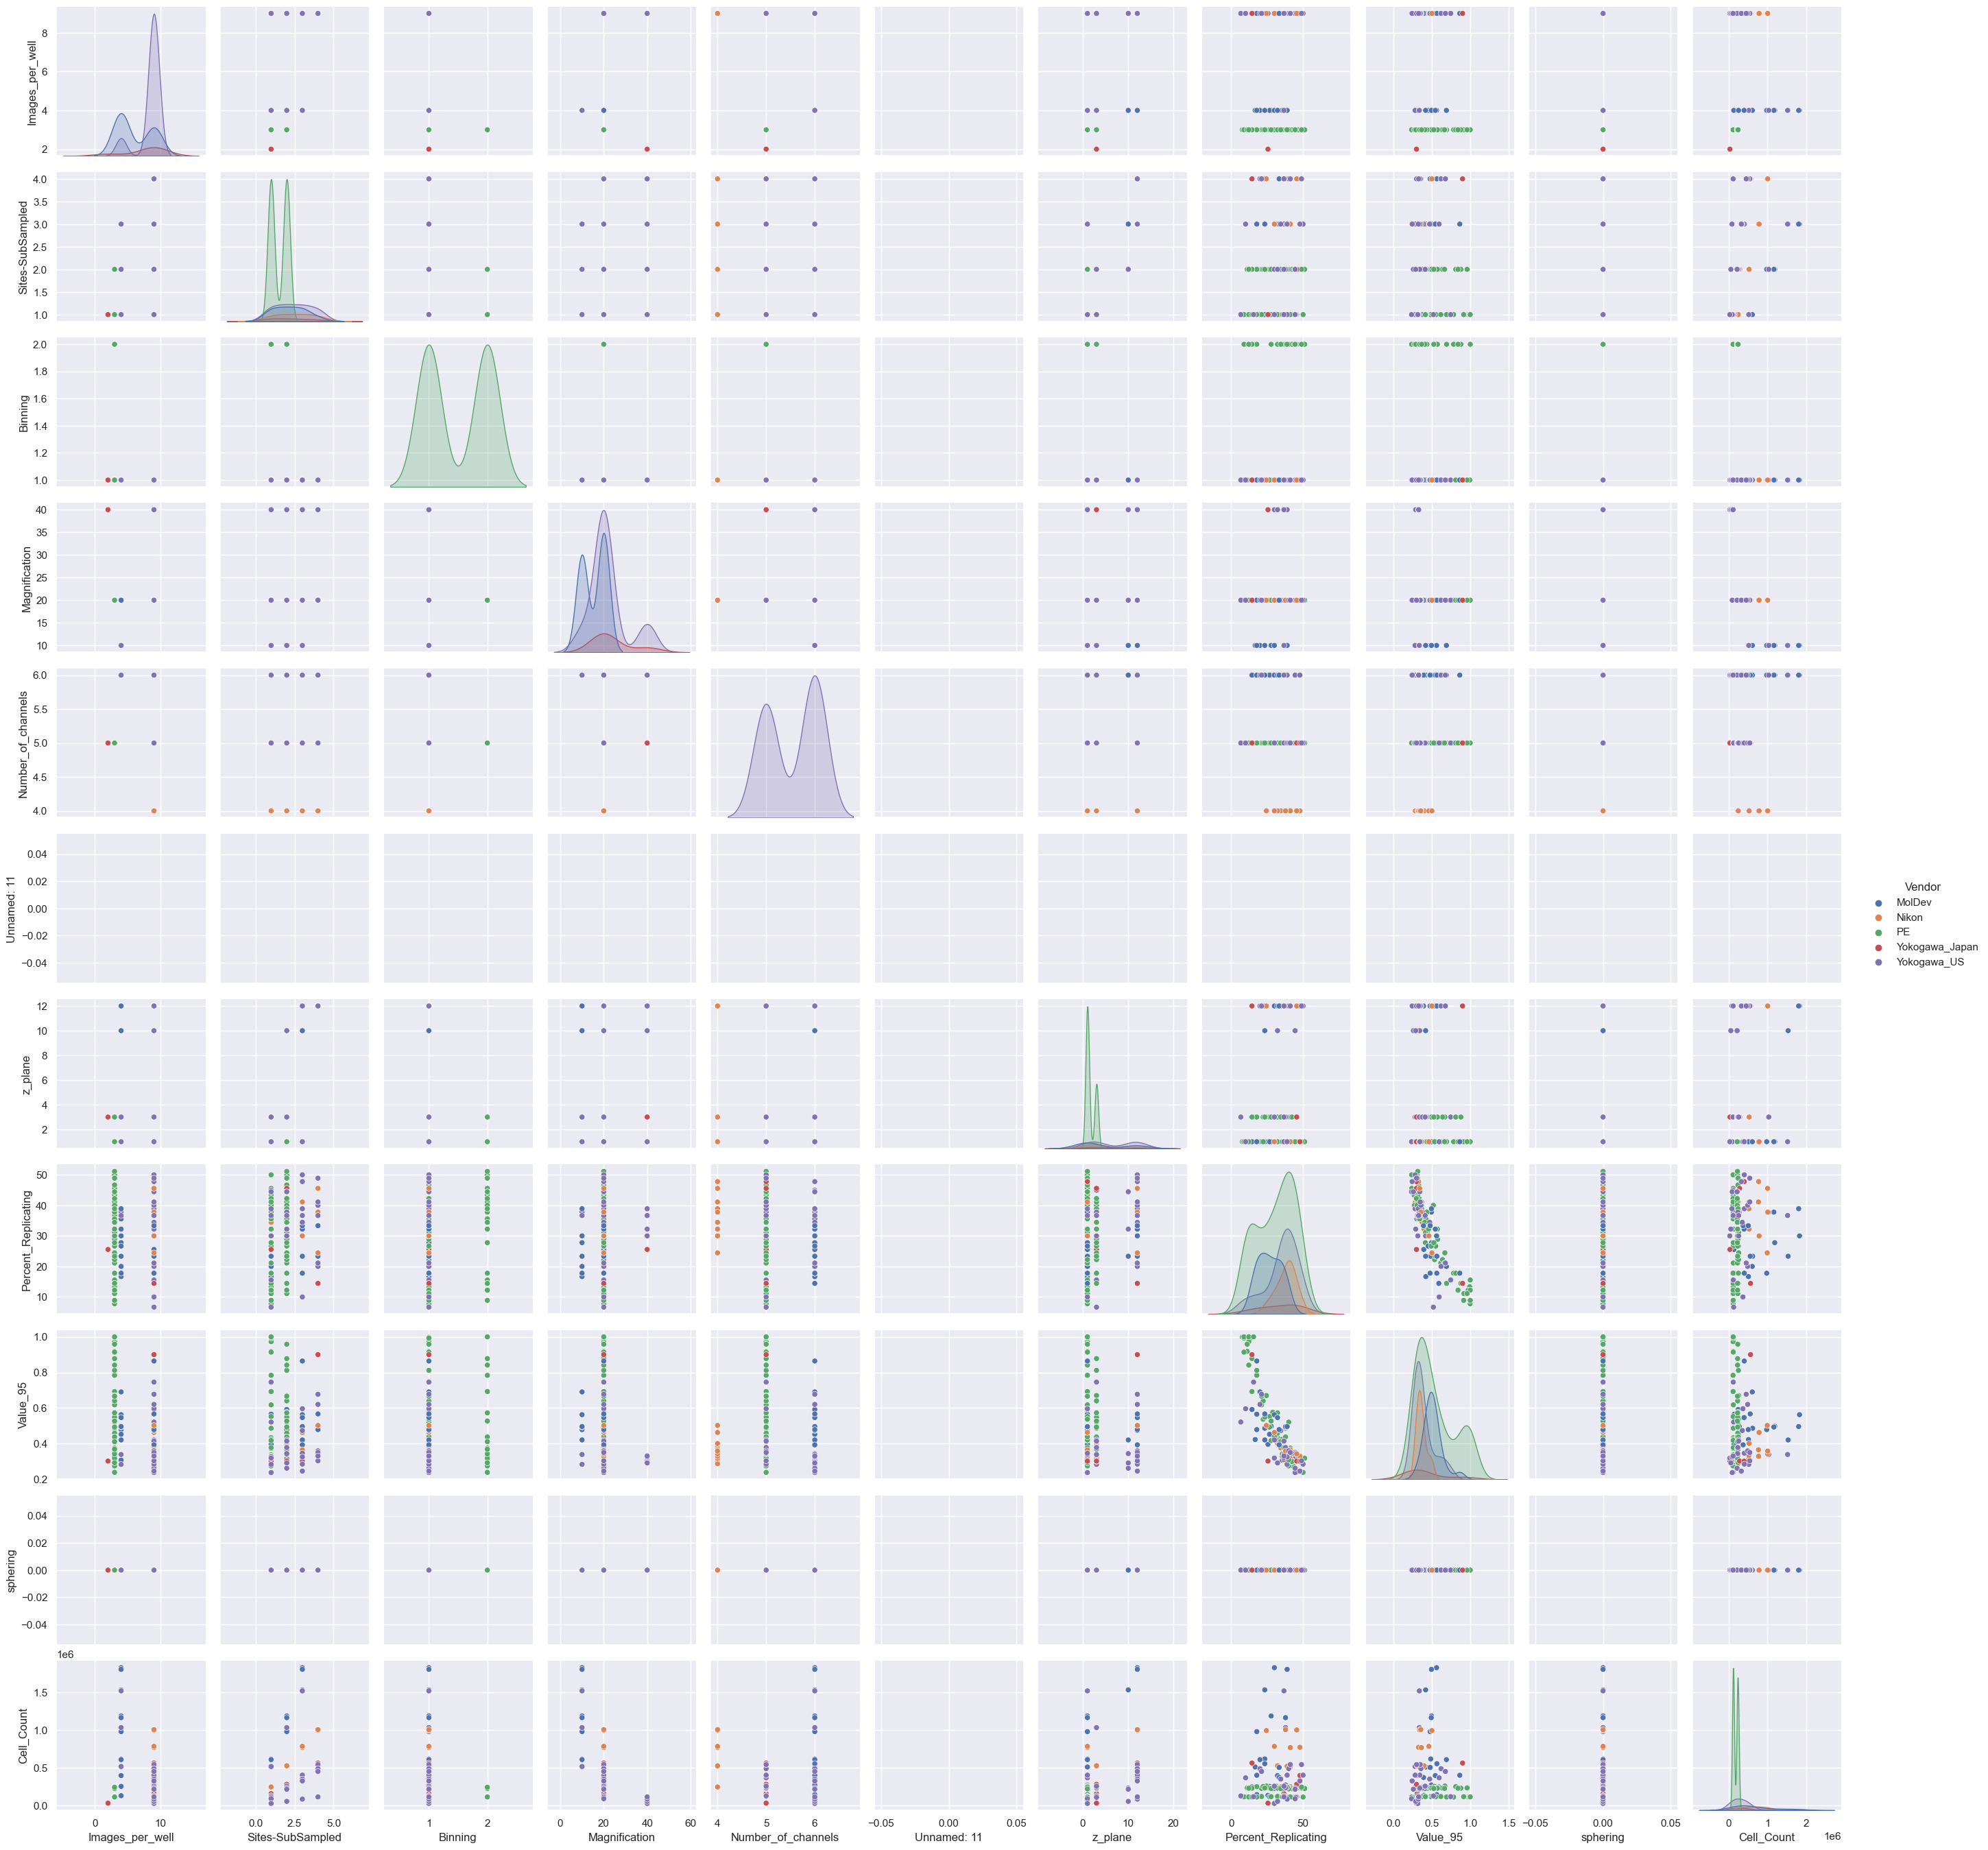

In [9]:
# Pairwise plotting
sns.set_theme(style="ticks")

sns.set(rc={'figure.facecolor':'white',})
sns.pairplot(fov_df_replicating, hue="Vendor")


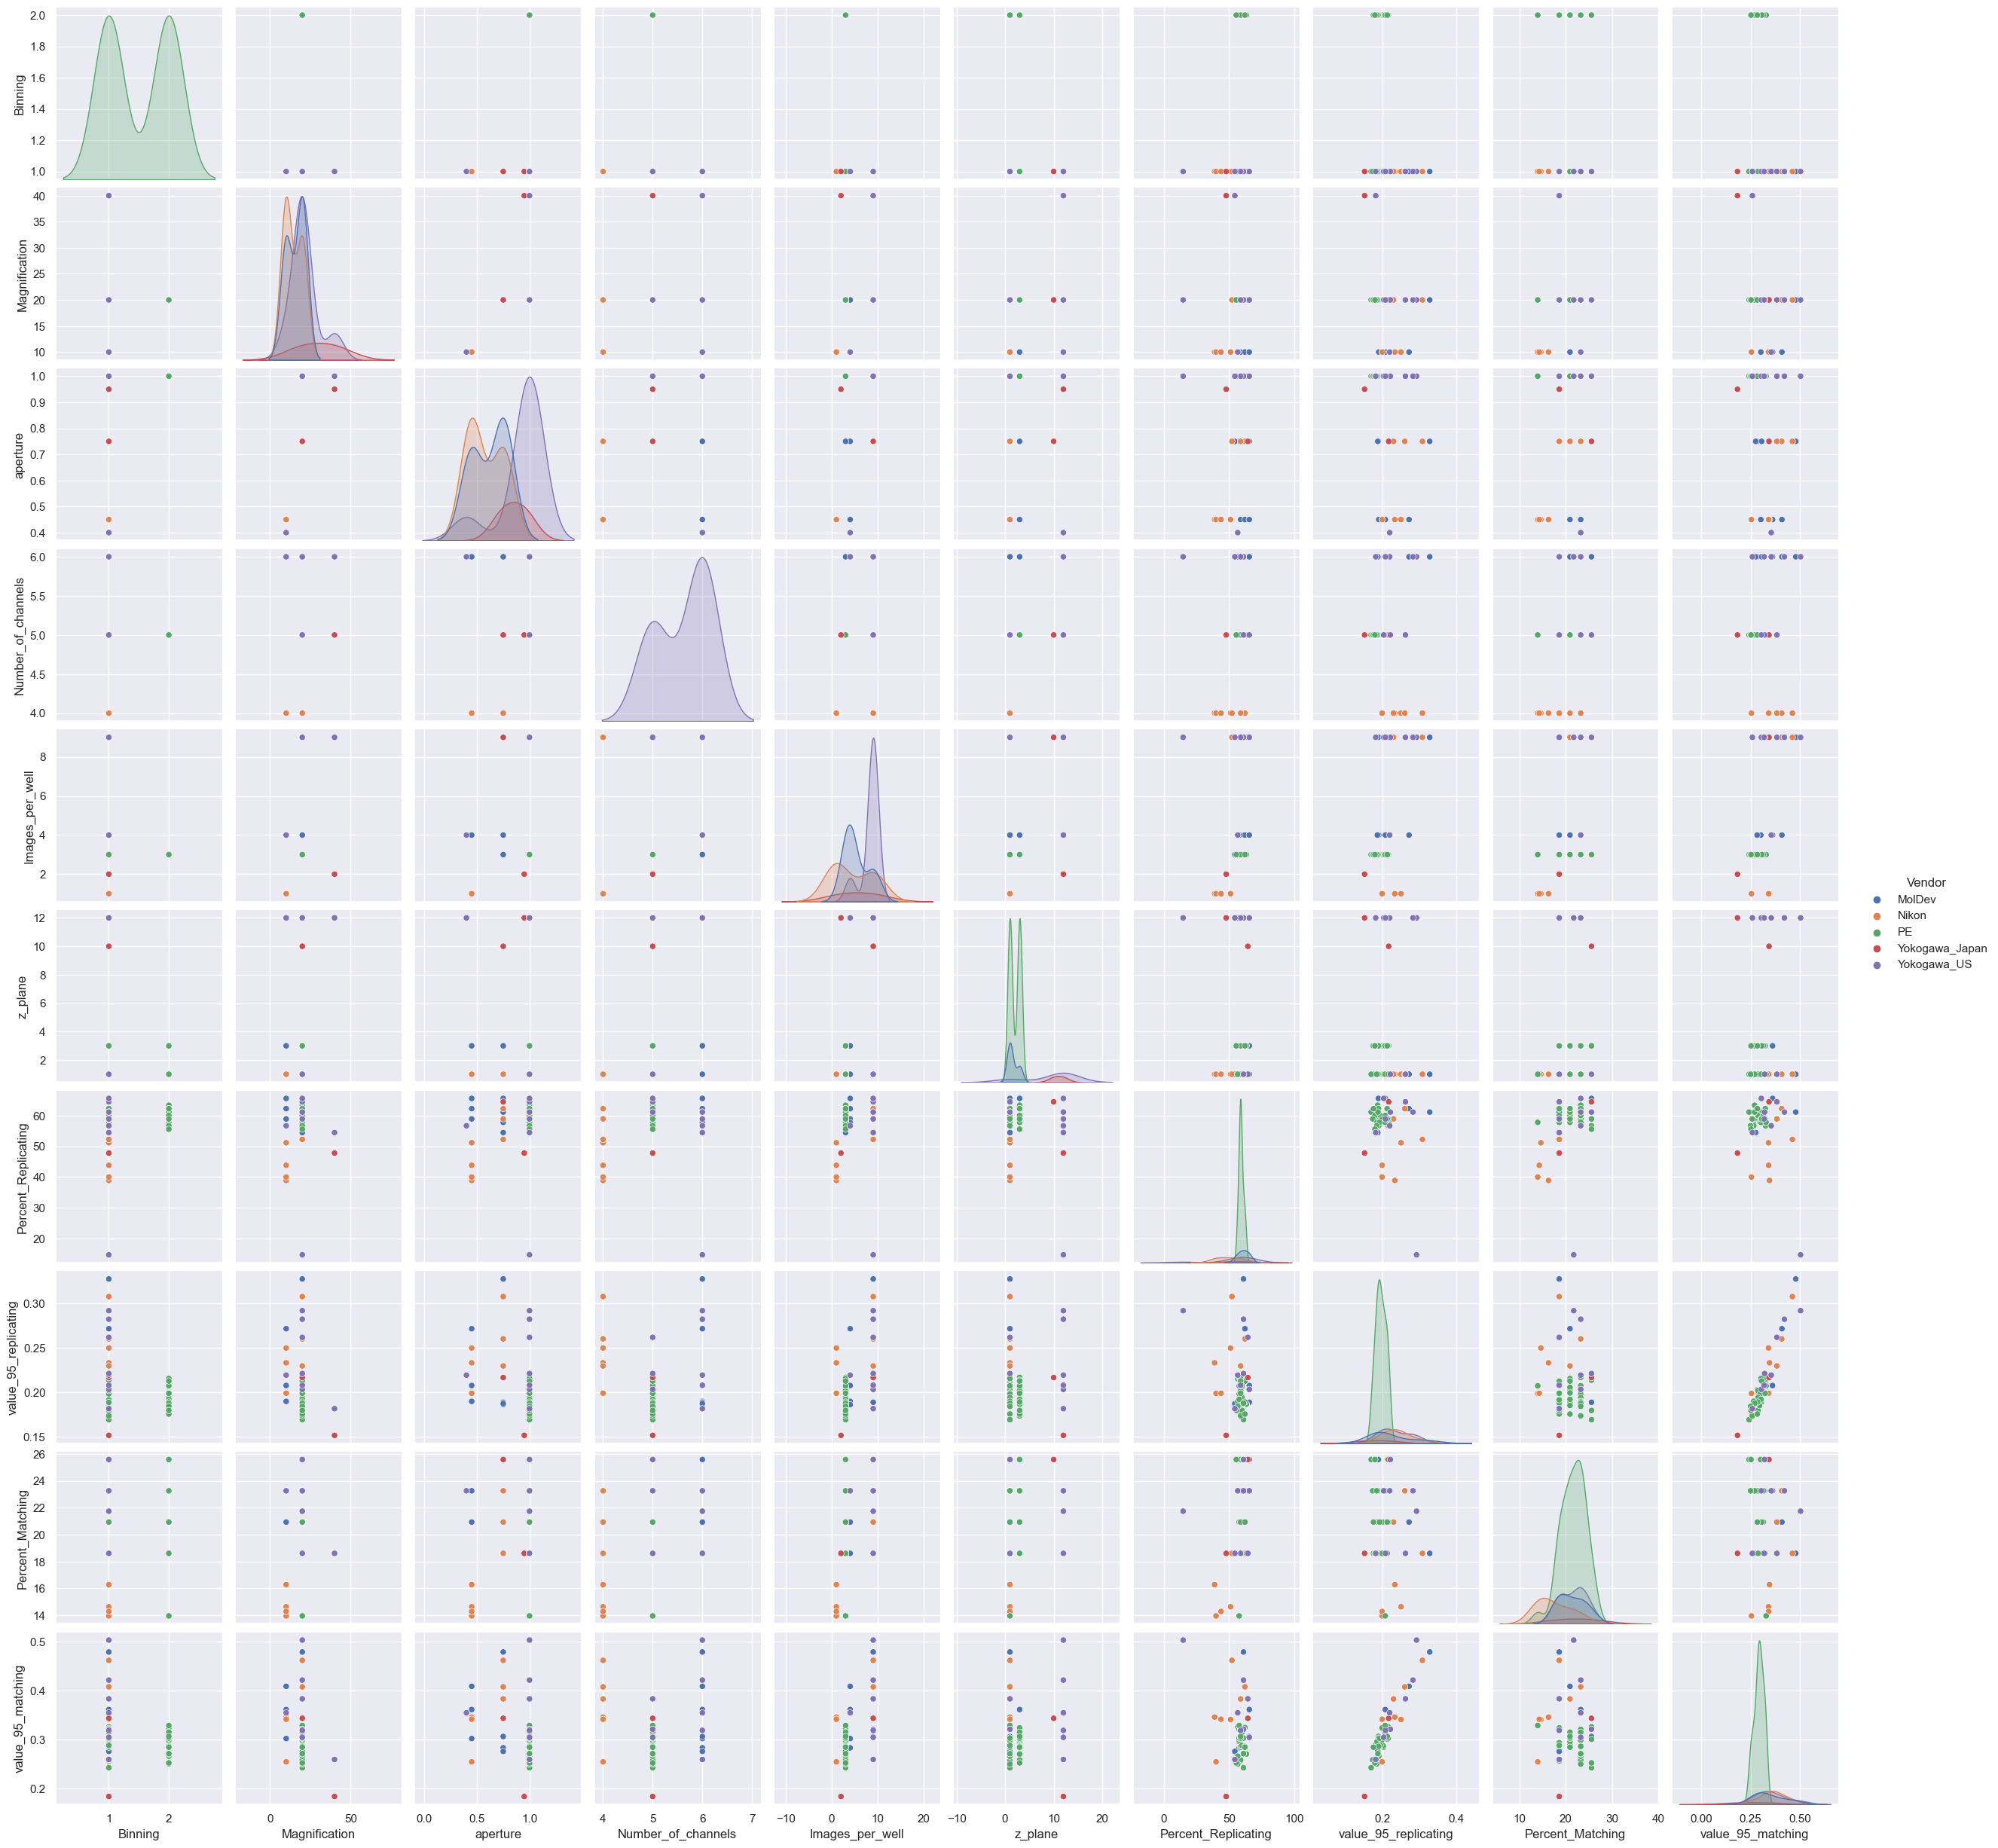

In [26]:

match_rep_df_sphere = match_rep_df.loc[match_rep_df["sphering"] == True].drop("sphering", axis=1)
# match_rep_df_sphere

sns.set_theme(style="ticks")
sns.set(rc={'figure.facecolor':'white',})
sns.pairplot(match_rep_df_sphere, hue="Vendor")